In [1]:
def stemplot(arr):
    stem_map = {}
    for i in arr:
        stem = int(i/10)
        if stem_map.get(stem,0) == 0:
            stem_map[stem] = [i%10]
        else:
            stem_map[stem].append(i%10)
    for i in stem_map:
        stem_map[i].sort()
    print("Stem  | Leaves\n")
    for i in sorted(stem_map.keys()):
        print(i, stem_map[i],sep = "     | ")
    return stem_map
    
if __name__ == "__main__":
    print("Question 1.... No Outliers are found...")
    a = stemplot([19,19,19,20,21,21,25,25,25,26,26,28,29,31,31,32,32,33,34,35,36,37,37,38,38,38,38,41,43,43])
    print("Question 2.... The marks 51 and 99 are outliers based on the below plot")
    b = stemplot([77,78,76,81,86,51,79,82,84,99])

Question 1.... No Outliers are found...
Stem  | Leaves

1     | [9, 9, 9]
2     | [0, 1, 1, 5, 5, 5, 6, 6, 8, 9]
3     | [1, 1, 2, 2, 3, 4, 5, 6, 7, 7, 8, 8, 8, 8]
4     | [1, 3, 3]
Question 2.... The marks 51 and 99 are outliers based on the below plot
Stem  | Leaves

5     | [1]
7     | [6, 7, 8, 9]
8     | [1, 2, 4, 6]
9     | [9]


The data given...
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4]


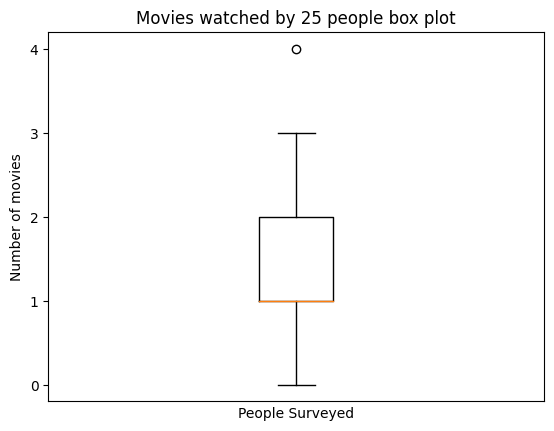

In [4]:
import matplotlib.pyplot as plt

data = 5*[0] + 9*[1] + 6*[2] + 4*[3] + [4]
print("The data given...\n",data)
plt.boxplot(data)
plt.title("Movies watched by 25 people box plot")
plt.ylabel("Number of movies")
plt.yticks([0,1,2,3,4])
plt.xticks([])
plt.xlabel("People Surveyed")

plt.show()

In [3]:
def mode(data):
    frequency = {}
    for item in data:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1
    max_frequency = max(frequency.values())
    me = [key for key, value in frequency.items() if value == max_frequency]
    return me


def median(data):
    data.sort()
    ln = len(data)
    med = 0
    if ln%2 == 0:
        m1 = int(ln/2)
        m2 = m1 - 1
        med = (data[m1] + data[m2])/2
    else:
        med = data[int(ln/2)]
    return med


def iqr(data):
    ln = len(data)
    ln = int(ln/2)
    q1 = median(data[:ln+1])
    q3 = median(data[ln+2:])
    return q3 - q1



data1 = [7,14,15,18,19,20,22,23,26,40,42]
freq = [1,3,1,1,4,3,1,1,1,2,2]
real_data = []

for i,j in zip(data1,freq):
    real_data += j*[i]

print("The number of years the students lived in california is given below....\n")
print(real_data)

print("\nThe Inter Quartile Range IQR of the given data....\n")
print(iqr(real_data))

print("\n The mode of the data....\n")
print(mode(real_data))

print("\n In this context, we can assume every student in the statistics class have participated in the survey hence the data encompasses entire population")

The number of years the students lived in california is given below....

[7, 14, 14, 14, 15, 18, 19, 19, 19, 19, 20, 20, 20, 22, 23, 26, 40, 40, 42, 42]

The Inter Quartile Range IQR of the given data....

15.0

 The mode of the data....

[19]

 In this context, we can assume every student in the statistics class have participated in the survey hence the data encompasses entire population


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Measure of Central Tendency:
                  mean       std  25%   50%  75%
sepal_length  5.843333  0.828066  5.1  5.80  6.4
sepal_width   3.057333  0.435866  2.8  3.00  3.3
petal_length  3.758000  1.765298  1.6  4.35  5.1
petal_width   1.199333  0.762238  0.3  1.30  1.8


/tmp/ipykernel_6185/2170685371.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal_length", data=iris,palette=my_pal)


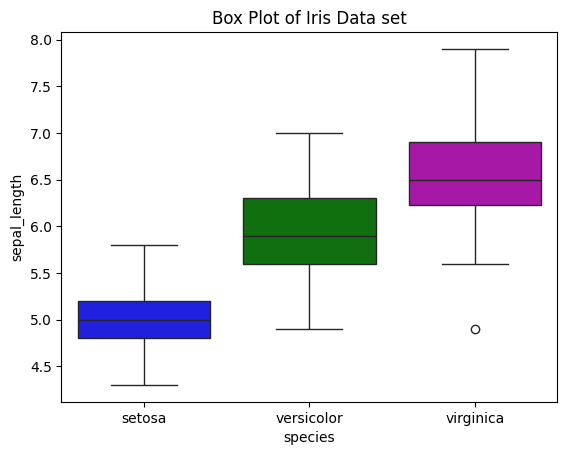

5.800000000000001 4.199999999999999
7.35 4.549999999999999
7.912500000000001 5.212499999999999
1.8375000000000006 1.1374999999999995
5.499999999999999 3.1000000000000005
7.0375000000000005 3.937499999999999

Outliers in Sepal Length:
species       
virginica  106    4.9
Name: sepal_length, dtype: float64

Outliers in petal Length:
species       
setosa      13    1.1
            22    1.0
            24    1.9
            44    1.9
versicolor  98    3.0
Name: petal_length, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(upper_bound,lower_bound)
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


iris = sns.load_dataset("iris")
print(iris.describe())

central_tendency = iris.describe().loc[["mean","std","25%","50%","75%"]].transpose()
mode_values = iris.mode(numeric_only=True).transpose()
print("\nMeasure of Central Tendency:")
print(central_tendency)

my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot(x="species", y="sepal_length", data=iris,palette=my_pal)
plt.title("Box Plot of Iris Data set")
plt.show()

outspl = iris.groupby("species")["sepal_length"].apply(find_outliers)
outptl = iris.groupby("species")["petal_length"].apply(find_outliers)
print("\nOutliers in Sepal Length:")
print(outspl)
print("\nOutliers in petal Length:")
print(outptl)